       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

[Text(0.4791666666666667, 0.9166666666666666, 'x[22] <= 106.05\ngini = 0.465\nsamples = 426\nvalue = [157, 269]'),
 Text(0.2708333333333333, 0.75, 'x[27] <= 0.159\ngini = 0.067\nsamples = 259\nvalue = [9, 250]'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[27] <= 0.135\ngini = 0.031\nsamples = 253\nvalue = [4, 249]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[10] <= 0.643\ngini = 0.008\nsamples = 242\nvalue = [1, 241]'),
 Text(0.041666666666666664, 0.25, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(0.125, 0.25, 'x[8] <= 0.166\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.4166666666666667, 'x[21] <= 29.455\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.20833333333333334, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.2916666666666667, 0.25, 'gini = 0.

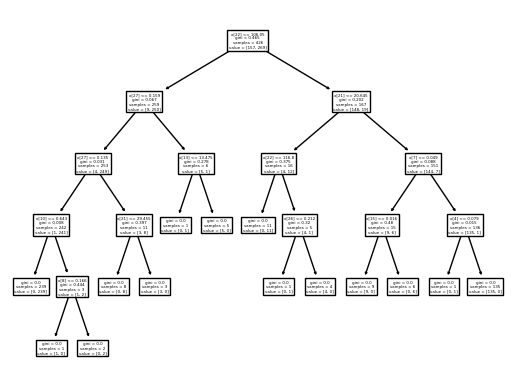

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

breast_cancer = load_breast_cancer()

df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
print(df.describe())

X_bc=breast_cancer.data
y_bc=breast_cancer.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X_bc, y_bc,
random_state=1)

dt=DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

tree.plot_tree(dt)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prédire les classes sur l'ensemble de test
y_pred = dt.predict(Xtest)

# Calculer l'accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculer la precision
precision = precision_score(ytest, y_pred)
print(f'Precision: {precision:.4f}')

# Calculer le recall
recall = recall_score(ytest, y_pred)
print(f'Recall: {recall:.4f}')

Accuracy: 0.9580
Precision: 0.9556
Recall: 0.9773
